# Modélisation

Import des différentes librairies

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

from sklearn.impute import KNNImputer

from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.neighbors import KNeighborsRegressor

import pickle

Récupération de la base de données sous forme de dataframe :

In [200]:
immoSV_df = pd.read_csv(r'C:\Users\Admin\Documents\marianneSimplon\simplon\immo_SiliconValley_marianneD\data\traindata_ori.csv',delimiter=',', decimal='.')
immoSV_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [201]:
# Supression de la colonne Unnamed: 0
immoSV_df = immoSV_df.drop("Unnamed: 0", axis=1)

### Split du dataset en un dataset train et un dataset test

In [202]:
immoSV_train, immoSV_test = train_test_split(immoSV_df, test_size=0.3)

In [203]:
#Définition d'une fonction d'enregistrement des bases de données train et test
def registerData(df,type,numberIteration):
    outname = f'{numberIteration}_immoSV_{type}.csv'
    outdir = f'.\data\{numberIteration}it'
    if not os.path.exists(outdir):
        os.mkdir(outdir)
    fullname = os.path.join(outdir, outname)    
    df.to_csv(fullname, index=False)
    print(fullname)

In [204]:
registerData(immoSV_train,'train',0)
registerData(immoSV_test,'test',0)

.\data\0it\0_immoSV_train.csv
.\data\0it\0_immoSV_test.csv


In [205]:
#Définition d'une fonction de définition de X_train, y_train, X_test, y_test
def defDfTrainTest(numberIteration):
    global immoSV_train 
    immoSV_train = pd.read_csv(f'.\data\{numberIteration}it\{numberIteration}_immoSV_train.csv',delimiter=',', decimal='.')
    global immoSV_test
    immoSV_test = pd.read_csv(f'.\data\{numberIteration}it\{numberIteration}_immoSV_test.csv',delimiter=',', decimal='.')

In [206]:
#Définition d'une fonction de définition de X_train, y_train, X_test, y_test
def defXytt():
    global y_train 
    y_train = immoSV_train["median_house_value"]
    global X_train
    X_train = immoSV_train.drop(["median_house_value","ocean_proximity"], axis=1)
    global y_test
    y_test = immoSV_test["median_house_value"]
    global X_test
    X_test = immoSV_test.drop(["median_house_value","ocean_proximity"], axis=1)

In [207]:
#Définition d'une fonction de définition de X_train, y_train, X_test, y_test
def defXy():
    defXytt() 
    #rassemblement des datasets test et train pour le cross-validation
    global X
    X = pd.concat([X_train,X_test])
    global y
    y = pd.concat([y_train,y_test])

## 1ère itération : données manquantes - suppression

In [208]:
defDfTrainTest(0)

In [209]:
immoSV_train['total_bedrooms'].isna().value_counts()

False    11428
True       130
Name: total_bedrooms, dtype: int64

In [210]:
immoSV_train.dropna(axis=0, inplace=True)
immoSV_train['total_bedrooms'].isna().value_counts()

False    11428
Name: total_bedrooms, dtype: int64

In [211]:
immoSV_test['total_bedrooms'].isna().value_counts()

False    4908
True       46
Name: total_bedrooms, dtype: int64

In [212]:
immoSV_test.dropna(axis=0, inplace=True)
immoSV_test['total_bedrooms'].isna().value_counts()

False    4908
Name: total_bedrooms, dtype: int64

In [213]:
defXy()

In [214]:
# instantiate Dummy classifier
dummy_clf = DummyRegressor()
# 5-Fold Cross validate model
cv_results = cross_validate(dummy_clf, X, y, cv=5)
# obtain the mean of scores
cv_results['test_score'].mean()

-7.945605605597095e-05

In [215]:
# Choose your model
lr = LinearRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(lr, X, y, cv=5)
# obtain the mean of scores
cv_results['test_score'].mean()

0.6360036431706216

In [216]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MSE : 4867283647.007181
RMSE : 69765.92038386063
MAE : 50592.4500676761


In [217]:
registerData(immoSV_train,'train',1)
registerData(immoSV_test,'test',1)

.\data\1it\1_immoSV_train.csv
.\data\1it\1_immoSV_test.csv


## 2e itération : données manquantes - remplissage par médiane

In [218]:
defDfTrainTest(0)

### Données manquantes dans la feature total_bedrooms

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bedrooms', ylabel='count'>

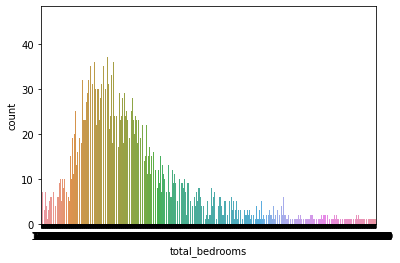

In [219]:
sns.countplot(immoSV_df['total_bedrooms'])

In [220]:
immoSV_df['total_bedrooms'].value_counts()

280.0     46
315.0     41
291.0     41
348.0     40
287.0     40
          ..
1550.0     1
1797.0     1
1743.0     1
1090.0     1
2479.0     1
Name: total_bedrooms, Length: 1828, dtype: int64

Le but ci-dessus est de déterminer si je vais utiliser la moyenne ou la médiane pour compléter les données manaquantes. La distribution n'est pas tout a fait gaussienne et il y a des données extrèmes en faible nombre : je choisis la médiane

In [221]:
# Remplissage des données manquantes par la médiane
immoSV_train['total_bedrooms'].fillna(immoSV_train['total_bedrooms'].median(),inplace=True)
immoSV_test['total_bedrooms'].fillna(immoSV_train['total_bedrooms'].median(),inplace=True)

In [222]:
defXy()

In [223]:
# Choose your model
lr = LinearRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(lr, X, y, cv=5)
# obtain the mean of scores
cv_results['test_score'].mean()

0.63477899558481

In [224]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MSE : 4888521629.115173
RMSE : 69917.96356527536
MAE : 50726.70318815058


## 3e itération : données manquantes - remplissage par KNN

In [225]:
defDfTrainTest(0)

In [226]:
imputer = KNNImputer(n_neighbors= int(round(np.sqrt(len(immoSV_train.index)))))
ft_imputer = imputer.fit(X_train)
immoSV_train_knn = pd.DataFrame(ft_imputer.transform(X_train),columns = X_train.columns)

In [227]:
total_bedrooms_train = pd.DataFrame(immoSV_train_knn['total_bedrooms'])

In [228]:
immoSV_train = immoSV_train.drop('total_bedrooms', axis=1)
immoSV_train = immoSV_train.merge(total_bedrooms_train,how='inner', on=immoSV_train.index)
immoSV_train = immoSV_train.drop('key_0', axis=1)

In [229]:
immoSV_train.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
total_bedrooms        False
dtype: bool

In [230]:
immoSV_test_knn = pd.DataFrame(ft_imputer.transform(X_test),columns = X_test.columns)

In [231]:
total_bedrooms_test = pd.DataFrame(immoSV_test_knn['total_bedrooms'])
immoSV_test = immoSV_test.drop('total_bedrooms', axis=1)
immoSV_test = immoSV_test.merge(total_bedrooms_test,how='inner', on=immoSV_test.index)
immoSV_test = immoSV_test.drop('key_0', axis=1)

In [232]:
immoSV_test.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
total_bedrooms        False
dtype: bool

In [233]:
defXy()

In [234]:
# Choose your model
lr = LinearRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(lr, X, y, cv=5)
# obtain the mean of scores
cv_results['test_score'].mean()

0.6347789955848093

In [235]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MSE : 4888521629.115188
RMSE : 69917.96356527547
MAE : 50726.70318815076


## 4e itération : scaling par normalisation

In [236]:
defDfTrainTest(1)

In [237]:
immoSV_train_part = immoSV_train[["median_house_value","ocean_proximity"]]
immoSV_test_part = immoSV_test[["median_house_value","ocean_proximity"]]

In [238]:
ss_X_train = immoSV_train.drop(["median_house_value","ocean_proximity"], axis=1)
ss_X_test = immoSV_test.drop(["median_house_value","ocean_proximity"], axis=1)

In [239]:
for c in range (0,8):
    print(f'{c} : {shapiro(immoSV_train.iloc[:, c])}')

0 : ShapiroResult(statistic=0.8980830311775208, pvalue=0.0)
1 : ShapiroResult(statistic=0.8780328631401062, pvalue=0.0)
2 : ShapiroResult(statistic=0.9781371355056763, pvalue=2.0205377207739646e-38)
3 : ShapiroResult(statistic=0.6894540786743164, pvalue=0.0)
4 : ShapiroResult(statistic=0.7349452972412109, pvalue=0.0)
5 : ShapiroResult(statistic=0.725050687789917, pvalue=0.0)
6 : ShapiroResult(statistic=0.7449917793273926, pvalue=0.0)
7 : ShapiroResult(statistic=0.8925807476043701, pvalue=0.0)


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Toutes les p-values de toutes les colonnes sont inférieures à 0.05. On rejete toutes les hypothèses nulles, soit les donénes suivent une loi normale. Je vais normaliser les données au lieu de les standardiser. <br>
Deux questions : des p-values à 0.0 ????! et s'il y a une variable qui est divisée en 2 groupes qui suivent une loi normale ???

##### Normalisation des données

In [240]:
sc = MinMaxScaler()
ft_sc = sc.fit(ss_X_train)
immoSV_train = ft_sc.transform(ss_X_train)
immoSV_train = pd.DataFrame(immoSV_train, columns=ss_X_train.columns)

In [241]:
immoSV_test = ft_sc.transform(ss_X_test)
immoSV_test = pd.DataFrame(immoSV_test, columns=ss_X_test.columns)

In [242]:
immoSV_train = immoSV_train.merge(immoSV_train_part,how='inner', on=immoSV_train.index)
immoSV_train = immoSV_train.drop('key_0', axis=1)
immoSV_test = immoSV_test.merge(immoSV_test_part,how='inner', on=immoSV_test.index)
immoSV_test = immoSV_test.drop('key_0', axis=1)

In [243]:
defXy()

In [244]:
# Choose your model
lr = LinearRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(lr, X, y, cv=5)
# obtain the mean of scores
cv_results['test_score'].mean()

0.6360036431706237

In [245]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MSE : 4867283647.007182
RMSE : 69765.92038386065
MAE : 50592.45006767649


In [246]:
registerData(immoSV_train,'train',4)
registerData(immoSV_test,'test',4)

.\data\4it\4_immoSV_train.csv
.\data\4it\4_immoSV_test.csv


## 5e itération : scaling par standardisation

In [247]:
defDfTrainTest(1)

In [248]:
immoSV_train_part = immoSV_train[["median_house_value","ocean_proximity"]]
immoSV_test_part = immoSV_test[["median_house_value","ocean_proximity"]]

##### Standardisation des données

In [249]:
ss_X_train = immoSV_train.drop(['ocean_proximity','median_house_value'], axis=1)
ss_X_test = immoSV_test.drop(['ocean_proximity','median_house_value'], axis=1)

In [250]:
ss = StandardScaler()
ft_ss = ss.fit(ss_X_train)
ss_immoSV_train = ft_ss.transform(ss_X_train)

In [251]:
ss_immoSV_test = ft_ss.transform(ss_X_test)

In [252]:
immoSV_train = pd.DataFrame(ss_X_train)
immoSV_test = pd.DataFrame(ss_X_test)

In [253]:
immoSV_train = immoSV_train.merge(immoSV_train_part,how='inner', on=immoSV_train.index)
immoSV_train = immoSV_train.drop('key_0', axis=1)
immoSV_test = immoSV_test.merge(immoSV_test_part,how='inner', on=immoSV_test.index)
immoSV_test = immoSV_test.drop('key_0', axis=1)

In [254]:
defXy()

In [255]:
# Choose your model
lr = LinearRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(lr, X, y, cv=5)
# obtain the mean of scores
cv_results['test_score'].mean()

0.6360036431706216

In [256]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MSE : 4867283647.007181
RMSE : 69765.92038386063
MAE : 50592.4500676761


## 6e itération : scaling par robustScaler

In [257]:
defDfTrainTest(1)

In [258]:
immoSV_train_part = immoSV_train[["median_house_value","ocean_proximity"]]
immoSV_test_part = immoSV_test[["median_house_value","ocean_proximity"]]

##### Robust standardisation

In [259]:
rs_X_train = immoSV_train.drop(['ocean_proximity','median_house_value'], axis=1)
rs_X_test = immoSV_test.drop(['ocean_proximity','median_house_value'], axis=1)

In [260]:
rs = RobustScaler()
ft_rs = rs.fit(rs_X_train)
immoSV_train = ft_rs .transform(rs_X_train)
immoSV_train = pd.DataFrame(immoSV_train, columns=ss_X_train.columns)

In [261]:
immoSV_test = ft_rs.transform(rs_X_test)
immoSV_test = pd.DataFrame(immoSV_test, columns=ss_X_test.columns)

In [262]:
immoSV_train = immoSV_train.merge(immoSV_train_part,how='inner', on=immoSV_train.index)
immoSV_train = immoSV_train.drop('key_0', axis=1)
immoSV_test = immoSV_test.merge(immoSV_test_part,how='inner', on=immoSV_test.index)
immoSV_test = immoSV_test.drop('key_0', axis=1)

In [263]:
defXy()

In [264]:
# Choose your model
lr = LinearRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(lr, X, y, cv=5)
# obtain the mean of scores
cv_results['test_score'].mean()

0.6360036431706237

In [265]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MSE : 4867283647.007184
RMSE : 69765.92038386066
MAE : 50592.4500676765


## 7e itération : encoding par OneHotEncoder

In [266]:
defDfTrainTest(4)

In [267]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = enc.fit(immoSV_train[['ocean_proximity']])
enc_df = pd.DataFrame(enc.transform(immoSV_train[['ocean_proximity']]).toarray())

In [268]:
immoSV_train = immoSV_train.merge(enc_df,how='inner', on=enc_df.index)
immoSV_train = immoSV_train.drop(['key_0','ocean_proximity'], axis=1)
immoSV_train.rename({0: 'NEAR_OCEAN', 1: 'NEAR_BAY',2: 'ISLAND', 3: 'INLAND', 4: 'H_OCEAN'}, inplace=True, axis=1)
immoSV_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR_OCEAN,NEAR_BAY,ISLAND,INLAND,H_OCEAN
0,0.586653,0.187035,0.607843,0.063747,0.073568,0.080104,0.068586,0.243707,158500.0,1.0,0.0,0.0,0.0,0.0
1,0.512948,0.181722,0.333333,0.084416,0.099488,0.068970,0.100658,0.228707,235000.0,0.0,0.0,0.0,0.0,1.0
2,0.623506,0.158342,0.509804,0.099945,0.092348,0.071421,0.100658,0.344830,276800.0,1.0,0.0,0.0,0.0,0.0
3,0.559761,0.183847,0.470588,0.089716,0.076207,0.059378,0.079276,0.355381,225800.0,1.0,0.0,0.0,0.0,0.0
4,0.708167,0.168969,0.490196,0.099338,0.110818,0.066870,0.101645,0.196790,98900.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11423,0.658367,0.159405,0.509804,0.058237,0.067981,0.069460,0.073520,0.175377,129600.0,0.0,1.0,0.0,0.0,0.0
11424,0.709163,0.027630,0.411765,0.078432,0.135185,0.061198,0.122204,0.127467,190600.0,0.0,0.0,0.0,0.0,1.0
11425,0.637450,0.275239,0.058824,0.069178,0.077604,0.040157,0.069079,0.258624,104400.0,0.0,1.0,0.0,0.0,0.0
11426,0.587649,0.155154,0.823529,0.042182,0.063014,0.030074,0.057895,0.238762,345800.0,1.0,0.0,0.0,0.0,0.0


In [269]:
enc_df = pd.DataFrame(enc.transform(immoSV_test[['ocean_proximity']]).toarray())
immoSV_test = immoSV_test.merge(enc_df,how='inner', on=enc_df.index)
immoSV_test = immoSV_test.drop(['key_0','ocean_proximity'], axis=1)
immoSV_test.rename({0: 'NEAR_OCEAN', 1: 'NEAR_BAY',2: 'ISLAND', 3: 'INLAND', 4: 'H_OCEAN'}, inplace=True, axis=1)
immoSV_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR_OCEAN,NEAR_BAY,ISLAND,INLAND,H_OCEAN
0,0.593625,0.158342,0.352941,0.038069,0.078690,0.026013,0.071546,0.182177,55000.0,1.0,0.0,0.0,0.0,0.0
1,0.600598,0.162593,1.000000,0.056682,0.047183,0.030039,0.050822,0.572840,500001.0,1.0,0.0,0.0,0.0,0.0
2,0.667331,0.167906,0.313725,0.079091,0.065963,0.045093,0.066447,0.393677,242700.0,0.0,1.0,0.0,0.0,0.0
3,0.605578,0.166844,0.745098,0.100683,0.141859,0.048139,0.122368,0.269617,352600.0,1.0,0.0,0.0,0.0,0.0
4,0.589641,0.157279,0.784314,0.063194,0.079777,0.034940,0.084211,0.268320,500001.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0.706175,0.180659,0.176471,0.125069,0.130684,0.042608,0.070066,0.279562,132400.0,0.0,1.0,0.0,0.0,0.0
4904,0.663347,0.104145,0.058824,0.056313,0.096694,0.041067,0.079112,0.203142,325000.0,1.0,0.0,0.0,0.0,0.0
4905,0.398406,0.382572,0.156863,0.070259,0.100109,0.051850,0.088651,0.083282,60400.0,0.0,1.0,0.0,0.0,0.0
4906,0.244024,0.490967,0.823529,0.040152,0.047959,0.019851,0.040789,0.326664,293300.0,1.0,0.0,0.0,0.0,0.0


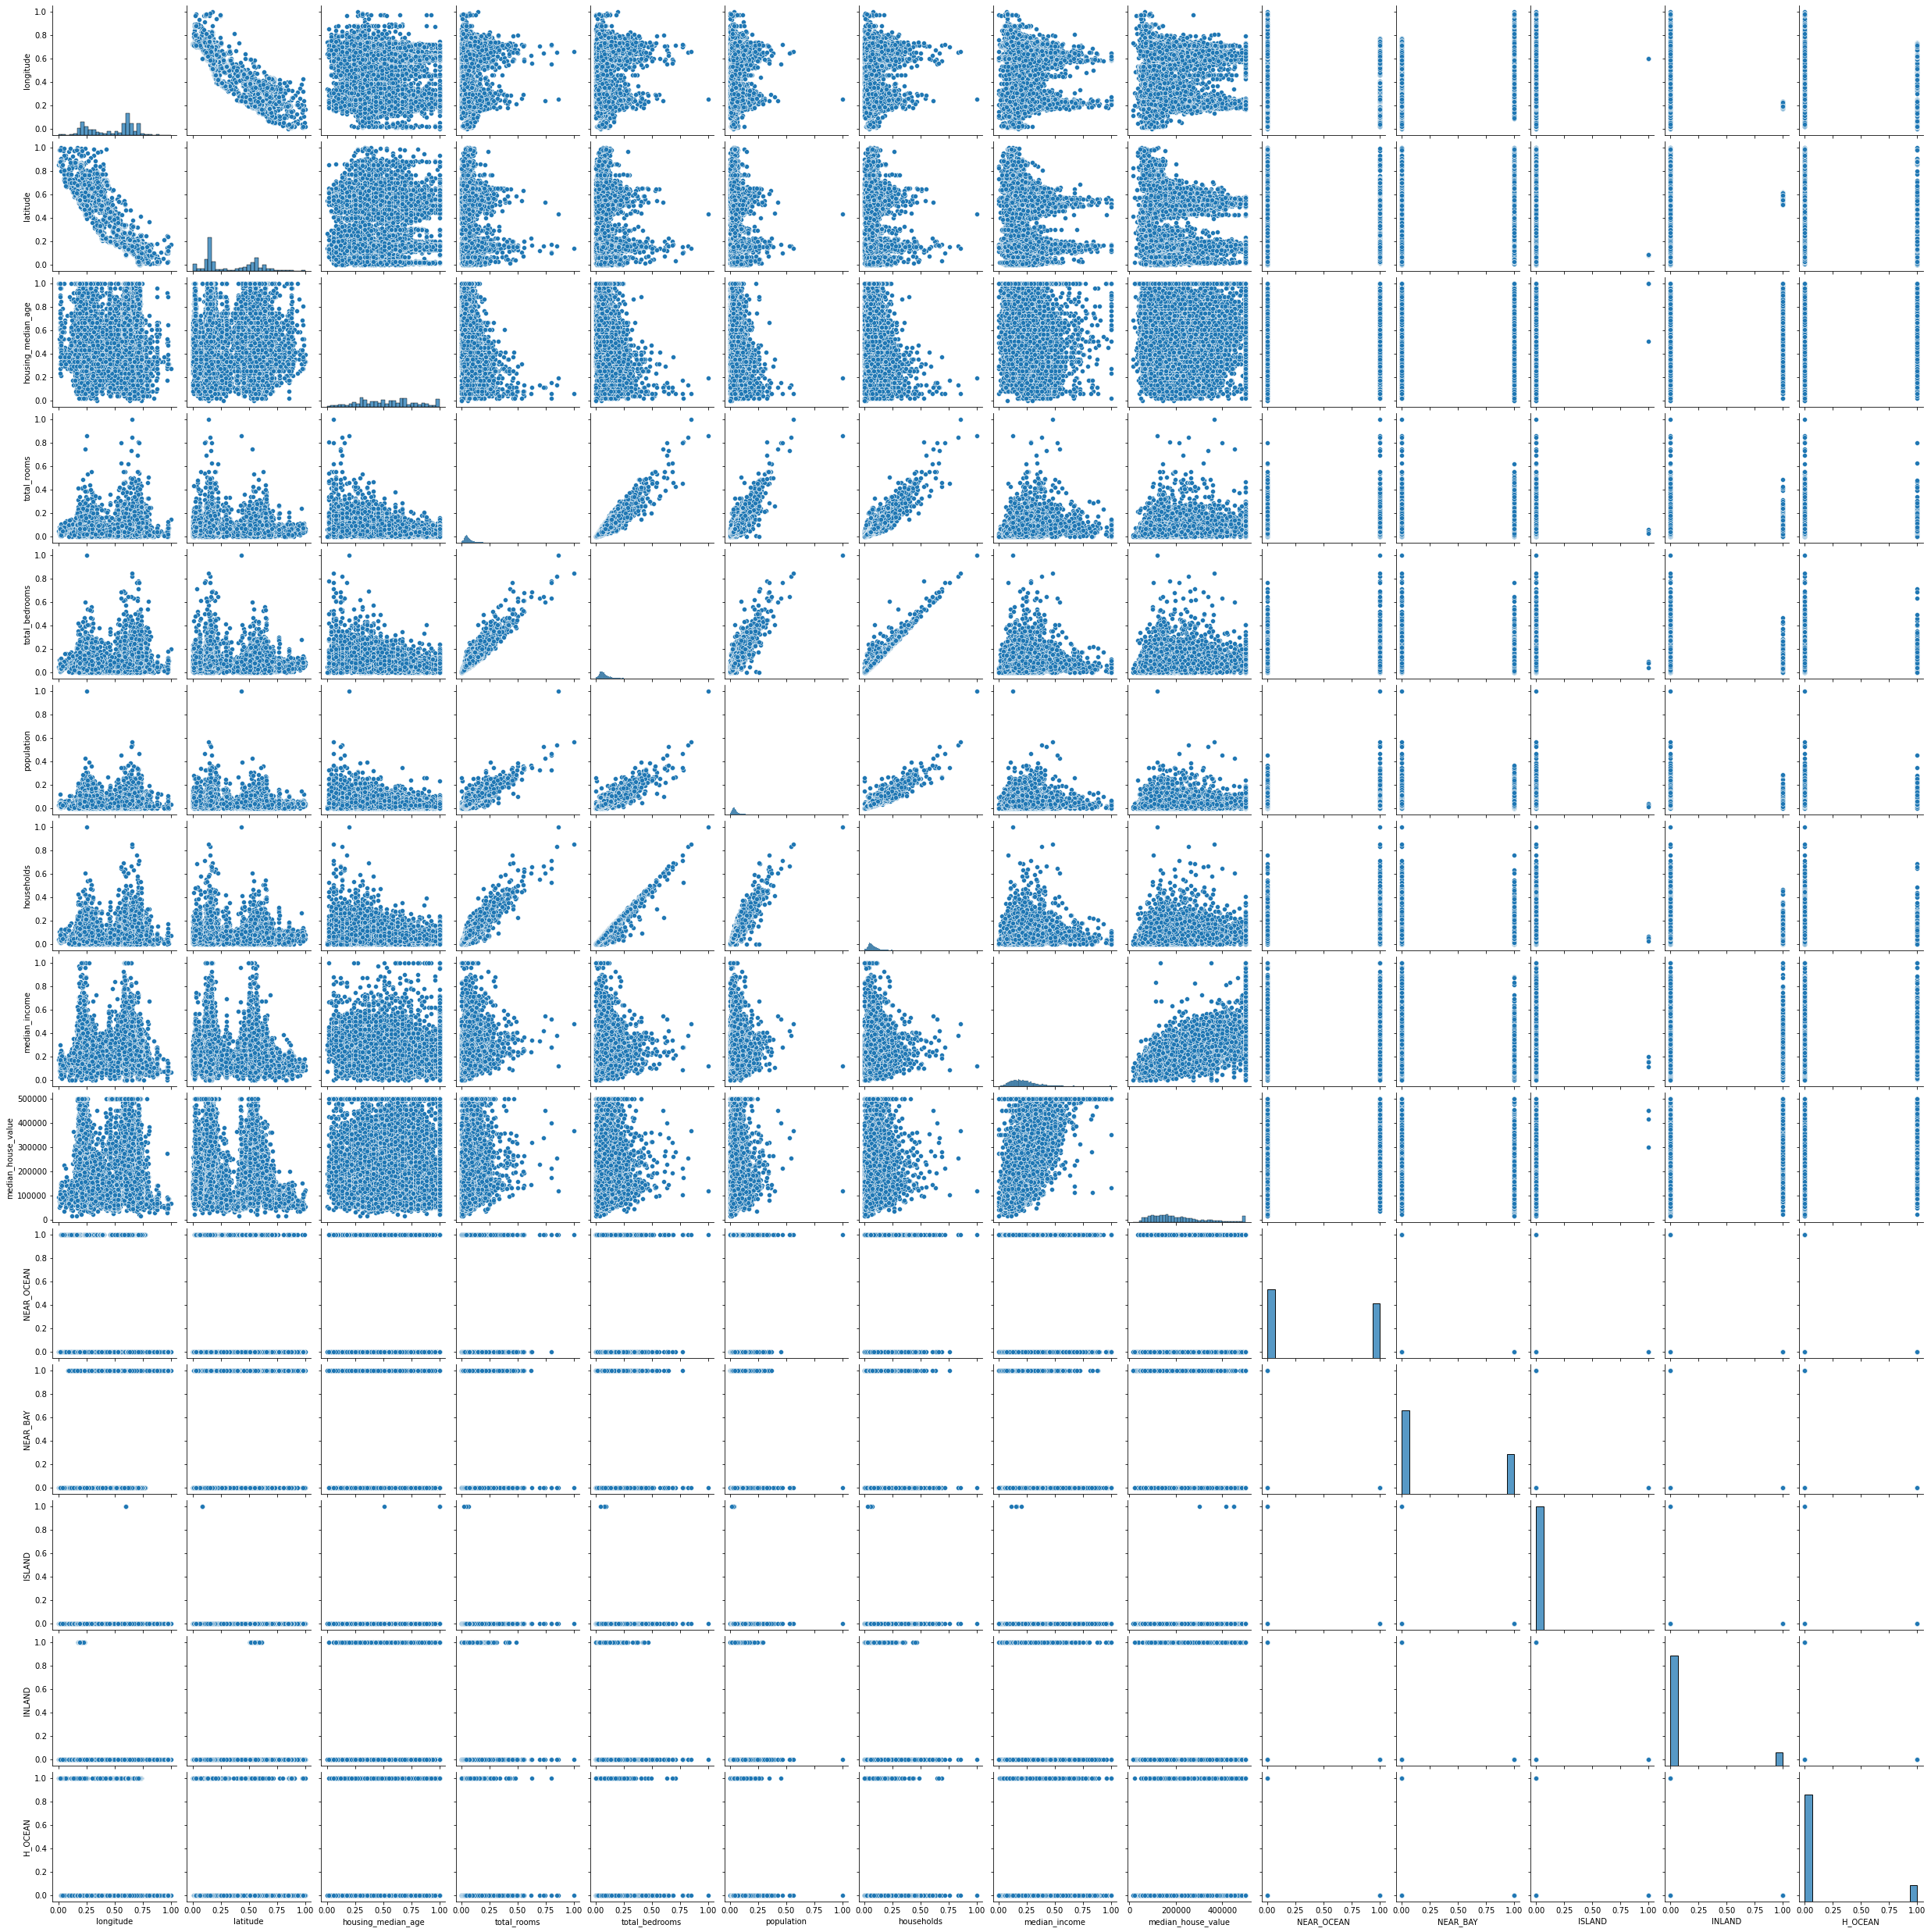

In [270]:
sns.pairplot(data=immoSV_train)

In [271]:
#Redéfinition de la fonction defXytt()
def defXytt():
    global y_train 
    y_train = immoSV_train["median_house_value"]
    global X_train
    X_train = immoSV_train.drop("median_house_value", axis=1)
    global y_test
    y_test = immoSV_test["median_house_value"]
    global X_test
    X_test = immoSV_test.drop("median_house_value", axis=1)

In [272]:
defXy()

In [273]:
# Choose your model
lr = LinearRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(lr, X, y, cv=5)
# obtain the mean of scores
cv_results['test_score'].mean()

0.6456266545833844

In [274]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MSE : 4730455844.502213
RMSE : 68778.30940421706
MAE : 49484.32169149988


In [275]:
registerData(immoSV_train,'train',7)
registerData(immoSV_test,'test',7)

.\data\7it\7_immoSV_train.csv
.\data\7it\7_immoSV_test.csv


## 8e itération : feature permutation

In [276]:
defDfTrainTest(7)

In [277]:
defXytt() 

In [278]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [279]:
# Perform Permutation
permutation_score = permutation_importance(lr, X_test, y_test,random_state=3,n_repeats=100) 
# Unstack results
importance_df = pd.DataFrame(np.vstack((X_test.columns,permutation_score.importances_mean)).T) 
importance_df.columns=['feature','feature importance']
# Order by importance
importance_df.sort_values(by="feature importance", ascending = False) 

,feature,feature importance
7,median_income,0.813971
1,latitude,0.465123
0,longitude,0.44135
5,population,0.395649
4,total_bedrooms,0.251787
9,NEAR_BAY,0.13726
6,households,0.106738
2,housing_median_age,0.026159
3,total_rooms,0.023739
8,NEAR_OCEAN,0.023494


In [280]:
lr = LinearRegression()
lr.fit(X_train[['median_income']], y_train)
print(lr.score(X_test[['median_income']], y_test))
lr.fit(X_train[['median_income','latitude']], y_train)
print(lr.score(X_test[['median_income','latitude']], y_test))
lr.fit(X_train[['median_income','latitude','longitude']], y_train)
print(lr.score(X_test[['median_income','latitude','longitude']], y_test))
lr.fit(X_train[['median_income','longitude','latitude','population']], y_train)
print(lr.score(X_test[['median_income','longitude','latitude','population']], y_test))
lr.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms']], y_train)
print(lr.score(X_test[['median_income','longitude','latitude','population','total_bedrooms']], y_test))
lr.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY']], y_train)
print(lr.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY']], y_test))
lr.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households']], y_train)
print(lr.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households']], y_test))
lr.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN']], y_train)
print(lr.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN']], y_test))
lr.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN','INLAND']], y_train)
print(lr.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN','INLAND']], y_test))
lr.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN','INLAND','housing_median_age']], y_train)
print(lr.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN','INLAND','housing_median_age']], y_test))
lr.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN','INLAND','housing_median_age','total_rooms']], y_train)
print(lr.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN','INLAND','housing_median_age','total_rooms']], y_test))
lr.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN','INLAND','housing_median_age','total_rooms','H_OCEAN']], y_train)
print(lr.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN','INLAND','housing_median_age','total_rooms','H_OCEAN']], y_test))
lr.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN','INLAND','housing_median_age','total_rooms','H_OCEAN','ISLAND']], y_train)
print(lr.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','NEAR_OCEAN','INLAND','housing_median_age','total_rooms','H_OCEAN','ISLAND']], y_test))

0.4819549205313203
0.489408314673331
0.5887347444072846
0.5909348668444412
0.6149503536479783
0.6290459623348171
0.627987020057535
0.6281123370428302
0.6281298240872011
0.6382119886963276
0.6400221993481134
0.6400688542033222
0.640068854203322


On enleve les variables H_OCEAN et ISLAND car ils n'apportent rien à notre score, voire ils les baissent. 

In [281]:
immoSV_train = immoSV_train.drop(['H_OCEAN', 'ISLAND'],axis=1)
immoSV_test = immoSV_test.drop(['H_OCEAN', 'ISLAND'],axis=1)
X_train = X_train.drop(['H_OCEAN', 'ISLAND'],axis=1)

In [282]:
vif_df = pd.DataFrame()
vif_df["vif_index"] = [vif(X_train.values, i) for i in range(X_train.shape[1])]
vif_df["features"] = X_train.columns
vif_df

,vif_index,features
0,12.724892,longitude
1,7.848979,latitude
2,7.018296,housing_median_age
3,31.460639,total_rooms
4,98.368068,total_bedrooms
5,18.480727,population
6,97.127768,households
7,6.753330,median_income
8,4.637504,NEAR_OCEAN
9,5.370965,NEAR_BAY


Latitude, longitude, total_rooms, total_bedrooms, households montrent de la colinéarité.

In [283]:
lr = LinearRegression()
lr.fit(X_train[['longitude','latitude','total_bedrooms','households','total_rooms']], y_train)
print(lr.score(X_test[['longitude','latitude','total_bedrooms','households','total_rooms']], y_test))
#total_rooms
lr.fit(X_train[['longitude','latitude','total_bedrooms','households']], y_train)
print(lr.score(X_test[['longitude','latitude','total_bedrooms','households']], y_test))
#households
lr.fit(X_train[['longitude','latitude','total_bedrooms','total_rooms']], y_train)
print(lr.score(X_test[['longitude','latitude','total_bedrooms','total_rooms']], y_test))
#total_berooms
lr.fit(X_train[['longitude','latitude','households','total_rooms']], y_train)
print(lr.score(X_test[['longitude','latitude','households','total_rooms']], y_test))
#latitude
lr.fit(X_train[['longitude','total_bedrooms','households','total_rooms']], y_train)
print(lr.score(X_test[['longitude','total_bedrooms','households','total_rooms']], y_test))
#longitude
lr.fit(X_train[['latitude','total_bedrooms','households','total_rooms']], y_train)
print(lr.score(X_test[['latitude','total_bedrooms','households','total_rooms']], y_test))

0.31956009578785727
0.24459993354044618
0.31558228051126813
0.31492663275408717
0.06269466034757576
0.08877961171698345


On garde longitude et latitude. On rejete total_bedrooms, total_rooms et households.

In [284]:
lr.fit(X_train[['median_income','longitude','latitude','population','NEAR_BAY','NEAR_OCEAN','housing_median_age']], y_train)
print(lr.score(X_test[['median_income','longitude','latitude','population','NEAR_BAY','NEAR_OCEAN','housing_median_age']], y_test))

0.6119042345805197


Devant la baisse de score, on garde toutes les variables.

In [285]:
defXy()

In [286]:
# Choose your model
lr = LinearRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(lr, X, y, cv=5)
# obtain the mean of scores
cv_results['test_score'].mean()

0.6452920969350652

In [287]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MSE : 4731069013.812715
RMSE : 68782.7668374333
MAE : 49502.08437471365


In [288]:
registerData(immoSV_train,'train',8)
registerData(immoSV_test,'test',8)

.\data\8it\8_immoSV_train.csv
.\data\8it\8_immoSV_test.csv


## 9e itération : Kmeans

In [289]:
defDfTrainTest(8)

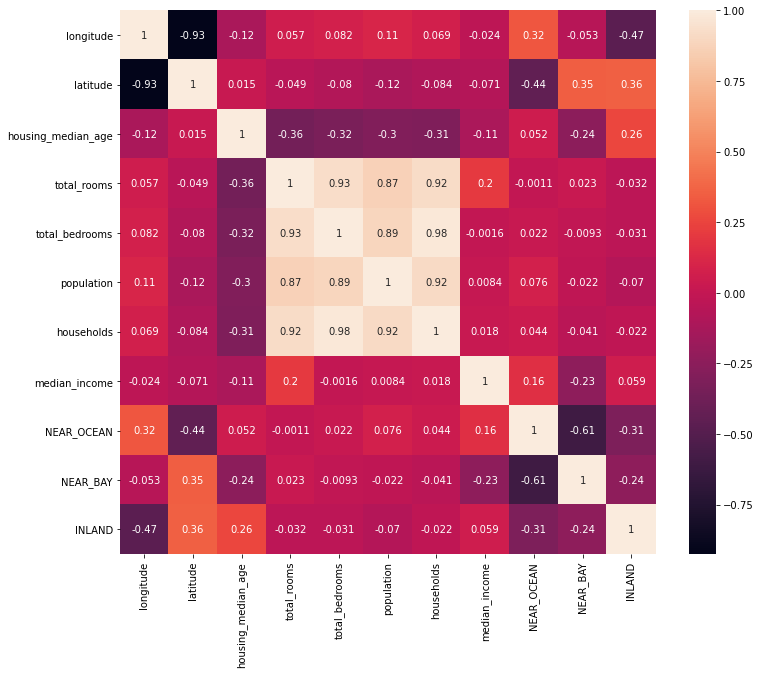

In [290]:
corr_immoSV_train = pd.DataFrame(immoSV_train, columns=X_train.columns).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_immoSV_train, annot=True)
plt.show()

Il y a de fortes corrélations entre les variables (>0.8 ou <-0.8). Je vais garder total_rooms de population-total_rooms-total_bedrooms-households.

In [291]:
ss_X_train = immoSV_train.drop(['median_house_value','population','total_bedrooms','households'],axis=1)
ss_X_test = immoSV_test.drop(['median_house_value','population','total_bedrooms','households'],axis=1)

In [292]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ss_X_train)
    distortions.append(kmeanModel.inertia_)

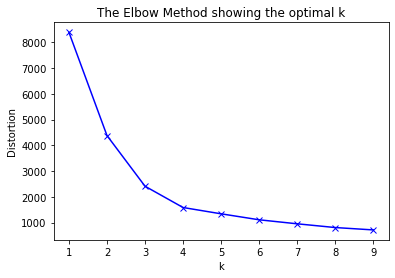

In [293]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Il y a un coude à 4. On va identifier 4 clusters.

In [294]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(ss_X_train)

KMeans(n_clusters=4)

In [295]:
score_silhouette = silhouette_score(ss_X_train, kmeanModel.labels_, metric='euclidean')
score_silhouette

0.5958518780771669

In [296]:
ss_X_train['k_means']=kmeanModel.predict(ss_X_train)
ss_X_train

,longitude,latitude,housing_median_age,total_rooms,median_income,NEAR_OCEAN,NEAR_BAY,INLAND,k_means
0,0.586653,0.187035,0.607843,0.063747,0.243707,1.0,0.0,0.0,1
1,0.512948,0.181722,0.333333,0.084416,0.228707,0.0,0.0,0.0,0
2,0.623506,0.158342,0.509804,0.099945,0.344830,1.0,0.0,0.0,1
3,0.559761,0.183847,0.470588,0.089716,0.355381,1.0,0.0,0.0,1
4,0.708167,0.168969,0.490196,0.099338,0.196790,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...
11423,0.658367,0.159405,0.509804,0.058237,0.175377,0.0,1.0,0.0,3
11424,0.709163,0.027630,0.411765,0.078432,0.127467,0.0,0.0,0.0,0
11425,0.637450,0.275239,0.058824,0.069178,0.258624,0.0,1.0,0.0,3
11426,0.587649,0.155154,0.823529,0.042182,0.238762,1.0,0.0,0.0,1


In [297]:
ss_X_test['k_means']=kmeanModel.predict(ss_X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

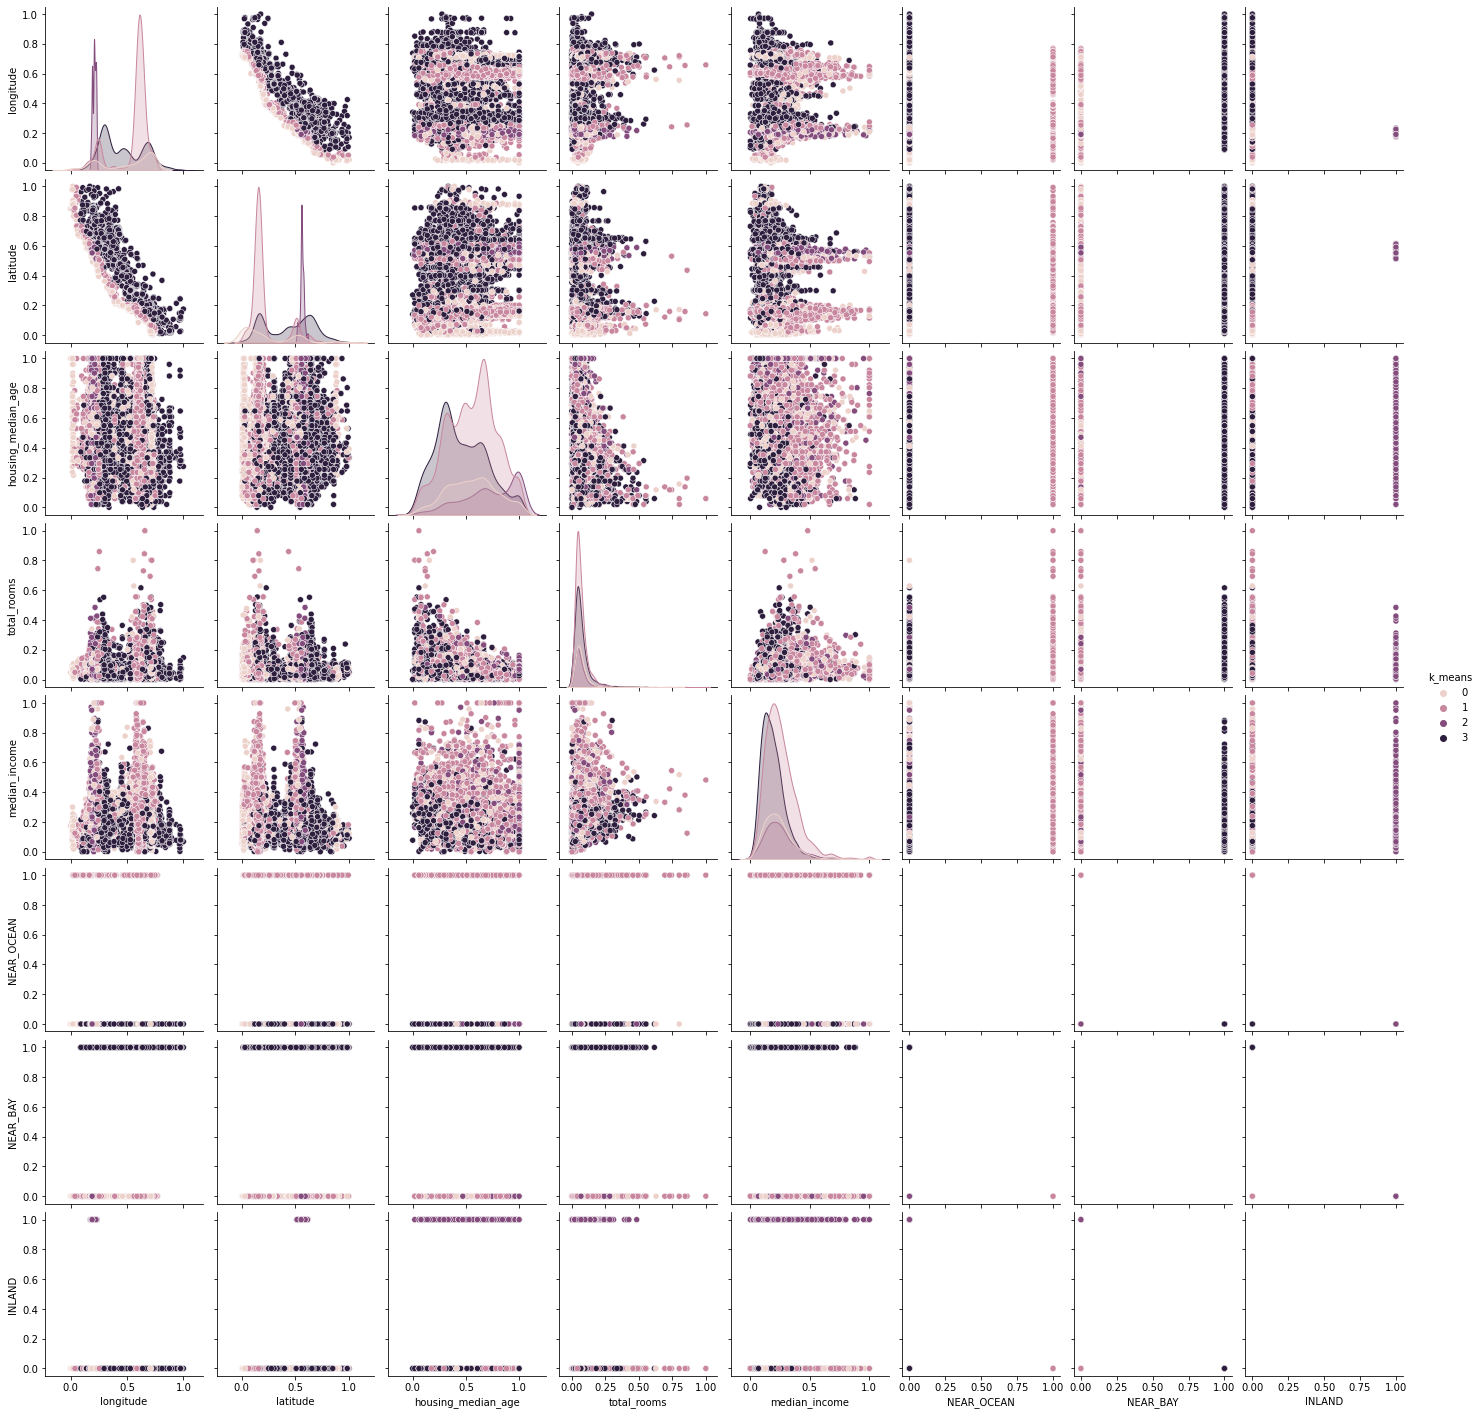

In [298]:
sns.pairplot(ss_X_train,hue='k_means')

Les groupes correspondent aux localisations des districts : 
- groupe 0 : total_rooms fort
- groupe 1 : san francisco & los angeles
- groupe 2 : californie sud
- groupe 3 : californie nord

In [299]:
ss_X_train = ss_X_train.merge(immoSV_train['median_house_value'],how='inner', on=ss_X_train.index)
immoSV_train = ss_X_train.drop('key_0', axis=1)
ss_X_test = ss_X_test.merge(immoSV_test['median_house_value'],how='inner', on=ss_X_test.index)
immoSV_test = ss_X_test.drop('key_0', axis=1)

In [300]:
immoSV_test

,longitude,latitude,housing_median_age,total_rooms,median_income,NEAR_OCEAN,NEAR_BAY,INLAND,k_means,median_house_value
0,0.593625,0.158342,0.352941,0.038069,0.182177,1.0,0.0,0.0,1,55000.0
1,0.600598,0.162593,1.000000,0.056682,0.572840,1.0,0.0,0.0,1,500001.0
2,0.667331,0.167906,0.313725,0.079091,0.393677,0.0,1.0,0.0,3,242700.0
3,0.605578,0.166844,0.745098,0.100683,0.269617,1.0,0.0,0.0,1,352600.0
4,0.589641,0.157279,0.784314,0.063194,0.268320,1.0,0.0,0.0,1,500001.0
...,...,...,...,...,...,...,...,...,...,...
4903,0.706175,0.180659,0.176471,0.125069,0.279562,0.0,1.0,0.0,3,132400.0
4904,0.663347,0.104145,0.058824,0.056313,0.203142,1.0,0.0,0.0,1,325000.0
4905,0.398406,0.382572,0.156863,0.070259,0.083282,0.0,1.0,0.0,3,60400.0
4906,0.244024,0.490967,0.823529,0.040152,0.326664,1.0,0.0,0.0,1,293300.0


In [301]:
defXy()

In [302]:
# Choose your model
lr = LinearRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(lr, X, y, cv=5)
# obtain the mean of scores
cv_results['test_score'].mean()

0.6114982101008223

In [303]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MSE : 5071439846.444097
RMSE : 71214.04248070809
MAE : 52308.24522306676


In [304]:
# registerData(immoSV_train,'train',9)
# registerData(immoSV_test,'test',9)

## 10e itération : KNN Regression

In [305]:
defDfTrainTest(8)

In [306]:
immoSV_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR_OCEAN,NEAR_BAY,INLAND
0,0.586653,0.187035,0.607843,0.063747,0.073568,0.080104,0.068586,0.243707,158500.0,1.0,0.0,0.0
1,0.512948,0.181722,0.333333,0.084416,0.099488,0.068970,0.100658,0.228707,235000.0,0.0,0.0,0.0
2,0.623506,0.158342,0.509804,0.099945,0.092348,0.071421,0.100658,0.344830,276800.0,1.0,0.0,0.0
3,0.559761,0.183847,0.470588,0.089716,0.076207,0.059378,0.079276,0.355381,225800.0,1.0,0.0,0.0
4,0.708167,0.168969,0.490196,0.099338,0.110818,0.066870,0.101645,0.196790,98900.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11423,0.658367,0.159405,0.509804,0.058237,0.067981,0.069460,0.073520,0.175377,129600.0,0.0,1.0,0.0
11424,0.709163,0.027630,0.411765,0.078432,0.135185,0.061198,0.122204,0.127467,190600.0,0.0,0.0,0.0
11425,0.637450,0.275239,0.058824,0.069178,0.077604,0.040157,0.069079,0.258624,104400.0,0.0,1.0,0.0
11426,0.587649,0.155154,0.823529,0.042182,0.063014,0.030074,0.057895,0.238762,345800.0,1.0,0.0,0.0


In [307]:
defXy()

In [308]:
model = KNeighborsRegressor()
# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)
# obtain the mean of scores
cv_results['test_score'].mean()

0.7069975382669904

In [309]:
model.fit(X_train,y_train)
model.predict(X_test)

array([208360. , 481240.8, 218980. , ...,  64560. , 302700. ,  91660. ])

# Model Pickle

In [310]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

# Critique du modele retenue (underfitting, etc.)